In [8]:
# Import necessary libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We do this to add the correct module to our python path.
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Simulation import run_simulation
from BuildSimulation import BuildSimulation
from util import get_risk_prob_proportions

In [13]:
# Declaring some variables that are used in the simulations.
filename = "results"
setup = BuildSimulation()
risks =[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

In [14]:
# Running the simulations. 
# UNCOMMENT THE FOLLOWING IF YOU WANT TO EXECUTE THE EXPERIMENTS.
'''
for risk in risks:
    print("Simulation for risk " + str(risk))
    setup.risk = risk
    savefile = filename + "-" + str(risk) + ".csv"
    run_simulation(setup, savefile)
'''

'\nfor risk in risks:\n    print("Simulation for risk " + str(risk))\n    setup.risk = risk\n    savefile = filename + "-" + str(risk) + ".csv"\n    run_simulation(setup, savefile)\n'

In [16]:
# Loading the results from the files.
filename = "results"
filenames = [filename + "-" + str(risk) + ".csv" for risk in risks]

results = []
for filename in filenames:
    result = pd.read_csv(filename)
    # Make sure the list has the right format, otherwise we cannot perform operations on it.
    for i in range(setup.num_generations):
        tmp = ast.literal_eval(result["rounds_contributions_counts"][i])
        result["rounds_contributions_counts"][i] = tmp
    results.append(result)

    
for result in results:
    print(result)

c:\users\willem\documents\cgt-project\venv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


      avg_payoffs                                   behaviors_counts  \
0        9.241571  [0.0, 0.0, 0.0, 3.0, 59.0, 37.0, 168.0, 413.0,...   
1       13.598487  [0.0, 0.0, 0.0, 30.0, 83.0, 2249.0, 1193.0, 96...   
2       14.669094  [0.0, 0.0, 0.0, 118.0, 535.0, 3526.0, 1011.0, ...   
3       15.327663  [0.0, 0.0, 0.0, 1089.0, 796.0, 3571.0, 221.0, ...   
4       16.220095  [0.0, 0.0, 244.0, 3034.0, 1179.0, 1149.0, 205....   
...           ...                                                ...   
9995    19.670000  [4764.0, 771.0, 297.0, 104.0, 64.0, 0.0, 0.0, ...   
9996    19.550000  [4287.0, 873.0, 715.0, 125.0, 0.0, 0.0, 0.0, 0...   
9997    19.600000  [4471.0, 737.0, 667.0, 125.0, 0.0, 0.0, 0.0, 0...   
9998    19.630000  [4495.0, 830.0, 610.0, 65.0, 0.0, 0.0, 0.0, 0....   
9999    19.580000  [4416.0, 774.0, 753.0, 57.0, 0.0, 0.0, 0.0, 0....   

                            rounds_contributions_counts  targets_reached  
0     [[1804.0, 2050.0, 2146.0], [1223.0, 1926.0, 28...     

In [17]:
# Getting all variables that will be used in plotting future figures
payoffs, targets, contribs, fh_contribs, sh_contribs = get_risk_prob_proportions(setup, risks, results)
generations = range(1, setup.num_generations + 1)

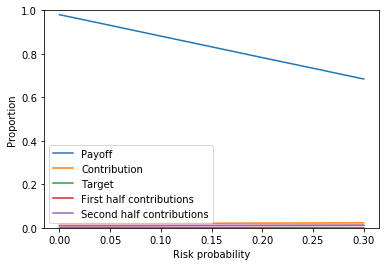

In [18]:
# Plot the risk probability proportions
plt.figure()
plt.plot(risks, payoffs, label="Payoff")
plt.plot(risks, contribs, label="Contribution")
plt.plot(risks, targets, label="Target")
plt.plot(risks, fh_contribs, label="First half contributions")
plt.plot(risks, sh_contribs, label="Second half contributions")
plt.ylim((0, 1))
plt.xlabel("Risk probability")
plt.ylabel("Proportion")
plt.legend()
plt.show()

In [19]:
# Plot the trajectories for all the results.
for result in results: 
    # Get the values used in the plot.
    payoffs, targets, rounds_contributions = result
    contributions = np.sum(rounds_contributions, axis=1)
    
    # Plot the actual figure.
    plt.figure(figsize=(16, 4))
    plt.plot(generations, payoffs / setup.initial_endowment, label="Payoff")
    plt.plot(generations, contributions / setup.initial_endowment, label="Contribution")
    plt.plot(generations, targets / setup.num_games, label="Target")
    plt.ylim((0, 1))
    plt.xlabel("Generations")
    plt.ylabel("Proportion")
    plt.legend()
    plt.show()

ValueError: too many values to unpack (expected 3)